In [1]:
import pandas as pd 
import itertools
from articles_preprocessing_for_word2vec import load_stop_words
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
stop_words=load_stop_words()

In [3]:
def plot_eval_word_clouds(results_df: pd.DataFrame, stopwords: list, mode: str) ->None:
    '''
    mode = 'all_articles' or 'evaluation'
    '''
    plt.figure(figsize=(14, 8))

    bias_dict = {'left': 0, 'right': 1}
    bias_reverse_dict = {'left': 'right', 'right':'left'}

    for n, bias in enumerate(['left', 'right']):
        if mode == 'all_articles':
            articles = results_df[results_df['label']==bias_dict[bias]]['article']
        elif mode=='evaluation':
            articles = nb_res[(nb_res['label']==bias_dict[bias]) & (nb_res['pred_label']==(bias_dict[bias]+1)%2)]['article']

        # unravel the list of lists
        articles_words = list(itertools.chain(*[article.split() for article in articles]))

        df = pd.DataFrame(articles_words)
        df.columns=['word']

        words=df['word'].to_list()

        plt.subplot(1,2,n+1)
        wordcloud=WordCloud(stopwords=stopwords, background_color="white").generate(','.join(words)) 
        plt.imshow(wordcloud, interpolation='bilinear')
        if mode == 'all_articles':
            plt.title(f'{bias.capitalize()} article words')
        elif mode == 'evaluation':
            plt.title(f'{bias.capitalize()} to {bias_reverse_dict[bias]} article classification')
        plt.axis("off")

plt.show()

Naive Bayes results

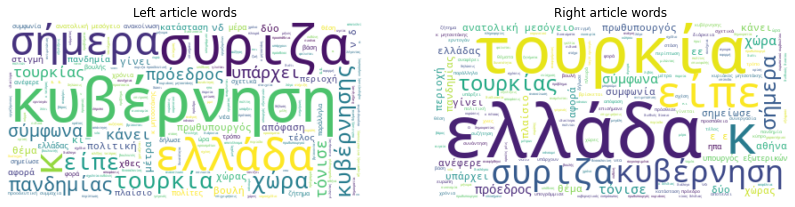

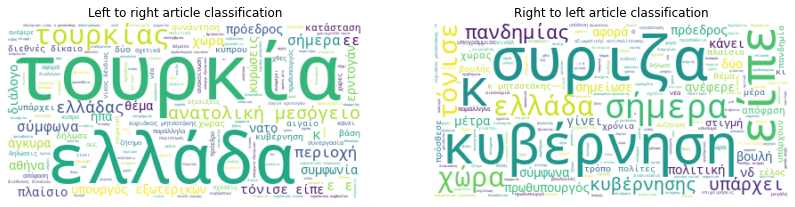

In [4]:
nb_res = pd.read_csv('articles/results/naive_bayes_political_bias_results.csv')
plot_eval_word_clouds(nb_res, stop_words, 'all_articles')
plot_eval_word_clouds(nb_res, stop_words, 'evaluation')

Logistic regression results

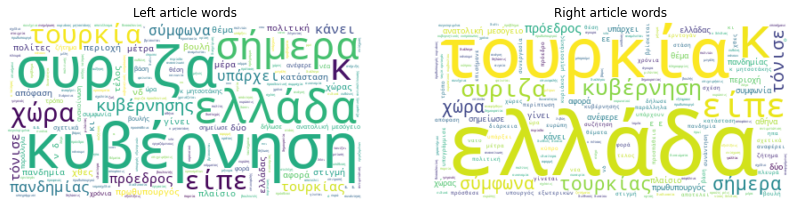

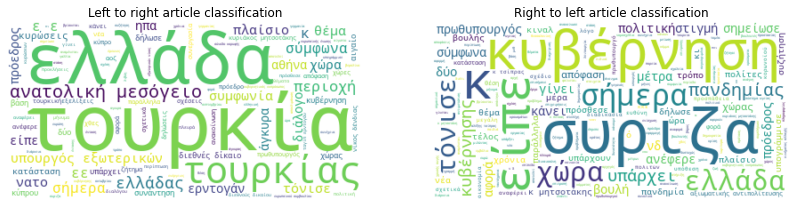

In [6]:
lg_res = pd.read_csv('articles/results/log_reg_political_bias_results.csv')
plot_eval_word_clouds(lg_res, stop_words, 'all_articles')
plot_eval_word_clouds(lg_res, stop_words, 'evaluation')